<a href="https://colab.research.google.com/github/juanserrano90/codelatam/blob/main/Augmented_Data_ViT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://github.com/juanserrano90/codelatam/blob/main/Training/ViT/Augmented_Data_ViT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
!git clone https://github.com/juanserrano90/codelatam.git

fatal: destination path 'codelatam' already exists and is not an empty directory.


In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read Data

In [41]:
# read augmented_images folder and create a list of images for each subfolder
import os

image_lists = {}
root_dir = 'codelatam/Data/augmented_images_v2'

for subdir, dirs, files in os.walk(root_dir):
  for file in files:
    if file.endswith(('.jpg', '.jpeg', '.png')):
      subdir_name = os.path.basename(subdir)
      if subdir_name not in image_lists:
        image_lists[subdir_name] = []
      # image_lists[subdir_name].append(os.path.join(subdir, file))
      image_lists[subdir_name].append(file)

# Print the list of images for each subfolder
sum_img = 0
for subdir_name, image_list in image_lists.items():
  sum_img += len(image_list)
  print(f"Subfolder: {subdir_name}, Number of images: {len(image_list)}")
  print(image_list)  # Uncomment to print the full list of images
print(f"Total number of images: {sum_img}")


Subfolder: 2, Number of images: 2386
['sn2004aw_12_2_12.2_6534_COPY.png', 'sn1998S_15_3_60.5_6299_COPY.png', 'sn2004et_13_3_268.3_5961.png', 'sn2005cs_13_3_2.1_6000.png', 'sn2000er_7_1_4.7_6601_COPY.png', 'sn2005ek_12_2_2.1_6539_COPY.png', 'sn1987A_16_3_-67.6_5744.png', 'sn1996cb_8_1_-3.5_4968.png', 'sn1979C_14_3_9.9_7147_COPY.png', 'sn2004aw_12_2_48.0_6501_COPY.png', 'sn2006bp_13_3_49.0_5989.png', 'sn1987A_16_3_471.0_5703.png', 'sn2006jc_7_1_43.0_6606_COPY.png', 'sn2008D_6_1_30.9_5348.png', 'sn1993J_8_1_2.7_4828.png', 'sn1999em_13_3_39.2_5879.png', 'sn1999em_13_3_90.0_5891.png', 'sn1987A_16_3_-80.5_5811.png', 'sn1993J_8_1_12.0_4924.png', 'sn1998bw_11_2_0.8_5017.png', '12au_6_1_-1.58_5284.png', 'sn2004gt_10_2_100.49_5433.png', 'sn1990B_10_2_5.0_5429.png', 'sn1980K_14_3_11.0_7031_COPY.png', 'sn1998S_15_3_120.3_6346_COPY.png', 'sn1987A_16_3_-26.6_5781.png', 'sn1994I_10_2_34.06_5526.png', 'sn1998S_15_3_30.7_6244_COPY.png', 'sn1987A_16_3_156.1_5827.png', 'sn1993J_8_1_68.0_4962.png', 'sn197

In [42]:
def maping(a):
  subtype_to_category = {0:0, 1:1, 2:1, 3:1, 4:1, 5:1, 6:2, 7:2, 8:2, 9:2, 10:2, 11:2, 12:2, 13:2, 14:2, 15:2, 16:2}
  return subtype_to_category[a]

inv_dict_mapping_classes = {0:'Ia-norm', 1:'Ia-pec', 2:'Others'}

# Checking augmented data

In [43]:
# For each subfolder, separate the images that say COPY in their path from those that do not.
import os

def separate_images_with_copy(images_by_subfolder):
  """
  Separates images in each subfolder based on whether 'COPY' is in their path.

  Args:
    images_by_subfolder: A dictionary where keys are subfolder names and values are lists of image paths.

  Returns:
    A dictionary with the same subfolder keys, but values are now dictionaries
    containing 'with_copy' and 'without_copy' lists of images.
  """
  separated_images = {}
  for subfolder, image_list in images_by_subfolder.items():
    with_copy = []
    without_copy = []
    for image_path in image_list:
      if 'COPY' in image_path:
        if subfolder == '1':  # FIX 1: there is a problem with the SN labeling
          str_list = image_path.split("_")
          with_copy.append("_".join(str_list[:-3])) # remove the copy counter and the .png string
        else:
          str_list = image_path.split("_")
          if any(ele in str_list[1] for ele in ['6', '8', '10', '11', '16']): # FIX 2: There are categories labeled as copies (even though they are not)
            without_copy.append("_".join(str_list[:-2]))
          else:
            with_copy.append("_".join(str_list[:-2])) # remove the copy counter and the .png string
      else:
        str_list = image_path.split("_")
        without_copy.append("_".join(str_list[:-1]))
    separated_images[subfolder] = {'with_copy': with_copy, 'without_copy': without_copy}
  return separated_images

separated_images = separate_images_with_copy(image_lists)

for subfolder, image_dict in separated_images.items():
  print(f"Subfolder: {subfolder}")
  print(f"  Copied images: {len(image_dict['with_copy'])}")
  # Uncomment to print the list of images with 'COPY'
  print(f"    Image list: {image_dict['with_copy']}")
  print(f"  Original images: {len(image_dict['without_copy'])}")
  # Uncomment to print the list of images without 'COPY'
  print(f"    Image list: {image_dict['without_copy']}")


Subfolder: 2
  Copied images: 970
    Image list: ['sn2004aw_12_2_12.2', 'sn1998S_15_3_60.5', 'sn2000er_7_1_4.7', 'sn2005ek_12_2_2.1', 'sn1979C_14_3_9.9', 'sn2004aw_12_2_48.0', 'sn2006jc_7_1_43.0', 'sn1980K_14_3_11.0', 'sn1998S_15_3_120.3', 'sn1998S_15_3_30.7', 'sn1979C_14_3_71.6', 'sn1998S_15_3_98.4', 'sn2006jc_7_1_35.5', 'sn2006jc_7_1_10.5', 'sn2004aw_12_2_12.2', 'sn1980K_14_3_66.0', 'sn2005la_9_1_18.0', 'sn1980K_14_3_9.0', 'sn2004aw_12_2_18.4', 'sn2007uy_9_1_141.82', 'sn1980K_14_3_217.0', 'sn1998S_15_3_120.3', 'sn2000er_7_1_9.7', 'sn2006jc_7_1_17.5', 'sn2007uy_9_1_-13.18', 'sn2004aw_12_2_3.6', 'sn1980K_14_3_12.0', 'sn2004aw_12_2_12.2', 'sn2000er_7_1_9.7', 'sn2007uy_9_1_45.82', 'sn2004aw_12_2_25.9', 'sn1980K_14_3_9.0', 'sn2007uy_9_1_-13.18', 'sn1980K_14_3_41.0', 'sn2006jc_7_1_5.5', 'sn1979C_14_3_12.9', 'sn1980K_14_3_12.0', 'sn1980K_14_3_66.0', 'sn2006jc_7_1_63.5', 'sn2007uy_9_1_-6.18', 'sn1998S_15_3_70.5', 'sn1998S_15_3_-13.1', 'sn1979C_14_3_12.9', 'sn2005la_9_1_18.0', 'sn2006jc_7_1_

In [44]:
# for each 'without_copy' string, count how many strings are repeated in 'with_copy'
import collections

count_dict = {}

for subfolder, image_dict in separated_images.items():
  without_copy_list = image_dict['without_copy']
  with_copy_list = image_dict['with_copy']

  for image_without_copy in without_copy_list:
    count = with_copy_list.count(image_without_copy)
    if image_without_copy not in count_dict:
      count_dict[image_without_copy] = count
    else:
      count_dict[image_without_copy] += count

# create a pandas dataframe using count_dict
import pandas as pd

df = pd.DataFrame(list(count_dict.items()), columns=['Image', 'Copies'])
df['Category'] = df['Image'].str.split('_').str[1]
print(df)


                    Image  Copies Category
0     sn2004et_13_3_268.3       0       13
1       sn2005cs_13_3_2.1       0       13
2      sn1987A_16_3_-67.6       0       16
3       sn1996cb_8_1_-3.5       0        8
4      sn2006bp_13_3_49.0       0       13
...                   ...     ...      ...
4635    sn2002eu_0_0_60.7       0        0
4636    sn1999cc_0_0_18.2       0        0
4637     sn2006S_0_0_-4.6       0        0
4638    sn1998dh_0_0_45.0       0        0
4639     sn2005cf_0_0_1.6       0        0

[4640 rows x 3 columns]


In [45]:
SNsubtype_original = {i: 0 for i in range(0, 17)}
SNsubtype_copies = {i: 0 for i in range(0, 17)}
SNsubtype_total = {i: 0 for i in range(0, 17)}

for subfolder, image_dict in separated_images.items():
  without_copy_list = image_dict['without_copy']
  with_copy_list = image_dict['with_copy']

  for image_name in without_copy_list:
    if int(image_name.split('_')[1]) in SNsubtype_original:
      SNsubtype_original[int(image_name.split('_')[1])] += 1

  for image_name in with_copy_list:
    if int(image_name.split('_')[1]) in SNsubtype_copies:
      SNsubtype_copies[int(image_name.split('_')[1])] += 1

  for key,value in SNsubtype_total.items():
    SNsubtype_total[key] = SNsubtype_original[key] + SNsubtype_copies[key]

In [46]:
# convert SNsubtype_original, SNsubtype_copies and SNsubtype_total to a one pandas dataframe
#   where the columns labels are N° originals, N° copies and N° total respectively
#   and each row label is the key of the dictionary

import pandas as pd
id_to_subtype = {0: 'Ia-norm',
 1: 'Ia-91T',
 3: 'Ia-csm',
 2: 'Ia-91bg',
 6: 'Ib-norm',
 4: 'Iax',
 5: 'Ia-pec',
 10: 'Ic-norm',
 13: 'IIP',
 14: 'IIL',
 8: 'IIb',
 16: 'II-pec',
 11: 'Ic-broad',
 12: 'Ic-pec',
 15: 'IIn',
 7: 'Ibn',
 9: 'Ib-pec'}

# Create a list of dictionaries, where each dictionary represents a row
rows = []
for key in SNsubtype_original:
  row = {
      'N° originals': SNsubtype_original[key],
      'N° copies': SNsubtype_copies[key],
      'N° total': SNsubtype_total[key]
  }
  rows.append(row)

# Create the DataFrame from the list of dictionaries
df = pd.DataFrame(rows, index=SNsubtype_original.keys())
df.index.name = "ID"
df['Category'] = df.index.map(maping)
df['Subtype'] = df.index.map(id_to_subtype)
df = df[['Category', 'Subtype', 'N° originals', 'N° copies', 'N° total']]
print(df)

    Category   Subtype  N° originals  N° copies  N° total
ID                                                       
0          0   Ia-norm          2387          0      2387
1          1    Ia-91T           398         79       477
2          1   Ia-91bg           264        213       477
3          1    Ia-csm            30        447       477
4          1       Iax            68        409       477
5          1    Ia-pec           141        336       477
6          2   Ib-norm           217          0       217
7          2       Ibn            31        186       217
8          2       IIb           216          0       216
9          2    Ib-pec            15        202       217
10         2   Ic-norm           217          0       217
11         2  Ic-broad           217          0       217
12         2    Ic-pec            33        184       217
13         2       IIP           176         41       217
14         2       IIL            13        204       217
15         2  

Images per class:

In [47]:
# for each category, show the row sum of the column "N° total"
category_total = df.groupby('Category')['N° total'].sum()
print(category_total)

Category
0    2387
1    2385
2    2386
Name: N° total, dtype: int64


Unique SNs by class:

In [48]:
from collections import defaultdict

# Dictionary to store base name counts and their subtypes for each subfolder
alld = dict()
for subfolder, images in image_lists.items():
    alld[subfolder] = defaultdict(lambda: {'count': 0, 'subtype': set()})
    for image in images:
        base_name = image.split('_')[0]
        subtype = image.split('_')[1]
        alld[subfolder][base_name]['count'] += 1
        alld[subfolder][base_name]['subtype'].add(subtype)

# Print the results for each class
for i in range(3):
    unique_sn_count = len(alld[str(i)].keys())
    print(f'Class {i}: {unique_sn_count} unique SNs')

Class 0: 319 unique SNs
Class 1: 95 unique SNs
Class 2: 102 unique SNs


This is why we can't balance subtype in train/test for class 2
(each subtype has 217 images)

In [49]:
# Sort and print the top 10 base names by count for Class 2
class_2_data = alld['2']
sorted_class_2 = sorted(class_2_data.items(), key=lambda x: x[1]['count'], reverse=True)

print("Top 10 base names by count for Class 2:")
for base_name, data in sorted_class_2[:15]:
    print(f"{base_name}: Count = {data['count']}, Subtype = {data['subtype']}")

Top 10 base names by count for Class 2:
sn1987A: Count = 217, Subtype = {'16'}
sn1998S: Count = 195, Subtype = {'15'}
sn2004aw: Count = 169, Subtype = {'12'}
sn2007uy: Count = 157, Subtype = {'9'}
sn2006jc: Count = 141, Subtype = {'7'}
sn1980K: Count = 139, Subtype = {'14'}
sn1979C: Count = 78, Subtype = {'14'}
sn2005la: Count = 60, Subtype = {'9'}
sn2004et: Count = 56, Subtype = {'13'}
sn1999em: Count = 56, Subtype = {'13'}
sn2005cs: Count = 54, Subtype = {'13'}
sn2000er: Count = 50, Subtype = {'7'}
sn2005ek: Count = 48, Subtype = {'12'}
sn1993J: Count = 48, Subtype = {'8'}
sn2009jf: Count = 38, Subtype = {'6'}


In [50]:
# this SNs must be on train set
force_train = ['sn1987A', 'sn1998S', 'sn2004aw', 'sn2007uy', 'sn2006jc', 'sn1980K', 'sn1979C']

In [51]:
suma = 0
for i in force_train:
  suma = suma + alld['2'][i]['count']
print(suma)

1096


How many images in image_lists:

In [52]:
# count how many images are in image_lists
total_images = sum(len(images) for images in image_lists.values())
print(f"Total number of images: {total_images}")

Total number of images: 7158


# Holdout test data

In [53]:
import random
import collections

def create_train_test_splits(image_lists, train_ratio=0.85, test_ratio=0.15, force_train=['sn1987A', 'sn1998S', 'sn2004aw', 'sn2007uy', 'sn2006jc', 'sn1980K', 'sn1979C']):
    """
    Creates train and test splits for images in each subfolder,
    ensuring that images with the same base name are not repeated across splits,
    and that at least one base name for each subtype is included in the test set for subfolder 1.
    Additionally, for subfolder 2, ensures specific base names go into the train set.

    Args:
        image_lists: A dictionary where keys are subfolder names and values are lists of image paths.
        train_ratio: The proportion of images to include in the training set.
        test_ratio: The proportion of images to include in the test set.

    Returns:
        A dictionary with subfolder names as keys and values as dictionaries containing 'train' and 'test' lists of images.
    """
    splits = {}
    subtypes = {}
    # Subtype mappings for subfolder 1
    subtype_ranges = {
        "0": [0],             # Subfolder 0 has subtype 0
        "1": list(range(1, 6)),  # Subfolder 1 has subtypes 1 to 5
        "2": list(range(6, 17))  # Subfolder 2 has subtypes 6 to 16
    }

    # Base names to force into train set for subfolder 2 for train/test ['sn1987A', 'sn1998S', 'sn2004aw', 'sn2007uy', 'sn2006jc', 'sn1980K', 'sn1979C']

    for subfolder, image_list in image_lists.items():
        # Shuffle the image list to randomize
        random.shuffle(image_list)

        # Extract subtype information for each image
        subtype_dict = collections.defaultdict(list)
        for image_path in image_list:
            subtype = int(image_path.split('_')[1])  # Extract subtype as an integer
            subtype_dict[subtype].append(image_path)

        train_images = set()
        test_images = set()
        base_names = {}
        assigned_subtypes = set()

        if subfolder == "1":
            # Step 1: Ensure at least one base name for each subtype in the test set for subfolder 1
            for subtype in subtype_ranges[subfolder]:
                if subtype in subtype_dict:
                    paths = subtype_dict[subtype]
                    random.shuffle(paths)  # Shuffle to ensure randomness
                    for path in paths:
                        base_name = path.split('_')[0]
                        if base_name not in base_names:
                            base_names[base_name] = 'test'
                            test_images.add(path)
                            assigned_subtypes.add(subtype)
                            break  # Stop once we've added one base name for this subtype

        # Step 2: Distribute remaining images into train and test sets
        for image_path in image_list:
            base_name = image_path.split('_')[0]

            # Ensure specific base names go into train set for subfolder 2
            if subfolder == "2" and base_name in force_train:
                base_names[base_name] = 'train'
                train_images.add(image_path)
            else:
              if base_name not in base_names:
                  if random.random() < train_ratio:
                      base_names[base_name] = 'train'
                      train_images.add(image_path)
                  else:
                      base_names[base_name] = 'test'
                      test_images.add(image_path)
              else:
                  # Add to the respective split based on the assigned base name
                  if base_names[base_name] == 'train':
                      train_images.add(image_path)
                  elif base_names[base_name] == 'test':
                      test_images.add(image_path)

        # Collect the subtypes for train and test splits
        train_subtypes = {int(image.split('_')[1]) for image in train_images}
        test_subtypes = {int(image.split('_')[1]) for image in test_images}

        splits[subfolder] = {'train': list(train_images), 'test': list(test_images)}
        subtypes[subfolder] = {'train': train_subtypes, 'test': test_subtypes}

    return splits, subtypes

In [54]:
# # Keep trying splits until the ratios are within the tolerance.
# counter = 0
# while True:
#   splits, subtypes = create_train_test_splits(image_lists)
#   counter += 1
#   tolerance = 0.03
#   a = []
#   c = []
#   for i in range(3):
#     subtotal = len(splits[str(i)]['train'])+len(splits[str(i)]['test'])
#     a.append(round(len(splits[str(i)]['train'])/subtotal,2))
#     c.append(round(len(splits[str(i)]['test'])/subtotal,2))

#   # if abs(a[0]-0.85) < tolerance and  abs(c[0]-0.15) < tolerance and abs(a[1]-0.85) < tolerance and abs(c[1]-0.15) < tolerance and abs(a[2]-0.85) < tolerance and abs(c[2]-0.15) < tolerance and len(subtypes['2']['test']) == 8:
#   if abs(a[0]-0.85) < tolerance and  abs(c[0]-0.15) < tolerance and abs(a[1]-0.85) < tolerance and \
#      abs(c[1]-0.15) < tolerance and abs(a[2]-0.85) < tolerance and abs(c[2]-0.15) < tolerance and \
#      6 in subtypes['2']['test'] and 7 in subtypes['2']['test'] and 8 in subtypes['2']['test'] and \
#      10 in subtypes['2']['test'] and 11 in subtypes['2']['test'] and 13 in subtypes['2']['test'] and \
#      15 in subtypes['2']['test']:

#       good_split = splits
#       break

# # Print the number of images in each split for each subfolder
# print('iterations:', counter)
# for key, value in splits.items():
#   print(f"{key}: {value}")

In [55]:
# # check the number of images in each split
# total = 0
# print('images per split:')
# for i in range(3):
#   print(len(splits[str(i)]['train']), len(splits[str(i)]['test']))
#   total += len(splits[str(i)]['train']) + len(splits[str(i)]['test'])
# print('----------------')
# print('total images:', total)
# # proportions
# print('----------------')
# print('proportions:')
# for i in range(3):
#   subtotal = len(splits[str(i)]['train'])+len(splits[str(i)]['test'])
#   print(round(len(splits[str(i)]['train'])/subtotal,2), round(len(splits[str(i)]['test'])/subtotal,2))

#   splits[str(i)]['test']

In [56]:
# # Print the different subtypes in train and test for each subfolder
# for subfolder, subtype_info in subtypes.items():
#     print(f"Subfolder {subfolder}:")
#     print(f"  Train subtypes: {sorted(subtype_info['train'])}")
#     print(f"  Test subtypes: {sorted(subtype_info['test'])}")

In [57]:
import pickle
# save the dictionary to a file to recover the same split later (because it's random everytime)
# last split: 0.83, 0.86, 0.86, [6, 7, 8, 10, 11, 13, 15]

# with open('drive/MyDrive/lssds24/codelatam/saved_test_train_split.pkl', 'wb') as f:
#     pickle.dump(splits, f)

In [58]:
# load the saved split dictionary
# el archivo 'saved_splits.pkl' se puede cargar de mi google drive (juan)
# https://drive.google.com/drive/folders/1I9gk_JM-oFOD4xplydMrtrNrqHZeU0Jo?usp=sharing

# splits saved: [saved_test_train_split.pk]
with open('drive/MyDrive/lssds24/codelatam/saved_test_train_split.pkl', 'rb') as f:
    splits = pickle.load(f)

In [59]:
# check the number of images in each split
total = 0
print('images per split:')
for i in range(3):
  print(len(splits[str(i)]['train']), len(splits[str(i)]['test']))
  total += len(splits[str(i)]['train']) + len(splits[str(i)]['test'])
print('----------------')
print('total images:', total)
# proportions
print('----------------')
print('proportions:')
for i in range(3):
  subtotal = len(splits[str(i)]['train'])+len(splits[str(i)]['test'])
  print(round(len(splits[str(i)]['train'])/subtotal,2), round(len(splits[str(i)]['test'])/subtotal,2))

  splits[str(i)]['test']

images per split:
1984 403
2052 333
2057 329
----------------
total images: 7158
----------------
proportions:
0.83 0.17
0.86 0.14
0.86 0.14


In [60]:
subts = []
for image in splits['2']['train']:
  subt = image.split('_')[1]
  if subt not in subts:
    subts.append(subt)
print('subtypes on train:', subts)
subts = []
for image in splits['2']['test']:
  subt = image.split('_')[1]
  if subt not in subts:
    subts.append(subt)
print('subtypes on test:', subts)

subtypes on train: ['15', '9', '7', '11', '12', '6', '8', '14', '10', '16', '13']
subtypes on test: ['6', '8', '7', '10', '15', '13', '11']


# Create validation splits

In [61]:
# # # we can use the same function as before, but the input data should be only the train sets
# splits_train = {'0':splits['0']['train'], '1':splits['1']['train'] , '2':splits['2']['train']}

# force_train_val = ['sn1987A', 'sn1998S']

In [62]:
# # Keep trying splits until the ratios are within the tolerance.
# counter = 0
# while True:
#   splits_2, subtypes_2 = create_train_test_splits(splits_train, force_train=force_train_val)
#   counter += 1
#   tolerance = 0.022
#   a = []
#   c = []
#   for i in range(3):
#     subtotal = len(splits_2[str(i)]['train'])+len(splits_2[str(i)]['test'])
#     a.append(round(len(splits_2[str(i)]['train'])/subtotal,2))
#     c.append(round(len(splits_2[str(i)]['test'])/subtotal,2))

#   # if abs(a[0]-0.85) < tolerance and  abs(c[0]-0.15) < tolerance and abs(a[1]-0.85) < tolerance and abs(c[1]-0.15) < tolerance and abs(a[2]-0.85) < tolerance and abs(c[2]-0.15) < tolerance and len(subtypes['2']['test']) == 8:
#   if abs(a[0]-0.85) < tolerance and  abs(c[0]-0.15) < tolerance and abs(a[1]-0.85) < tolerance and \
#      abs(c[1]-0.15) < tolerance and abs(a[2]-0.85) < tolerance and abs(c[2]-0.15) < tolerance and \
#      6 in subtypes['2']['test'] and 7 in subtypes['2']['test'] and 8 in subtypes['2']['test'] and \
#      10 in subtypes['2']['test'] and 11 in subtypes['2']['test'] and 13 in subtypes['2']['test']:

#       good_split = splits_2
#       break

# # Print the number of images in each split for each subfolder
# print('iterations:', counter)
# for key, value in splits_2.items():
#   print(f"{key}: {value}")

In [63]:
# # check the number of images in each split
# total = 0
# print('images per split:')
# for i in range(3):
#   print(len(splits_2[str(i)]['train']), len(splits_2[str(i)]['test']))
#   total += len(splits_2[str(i)]['train']) + len(splits_2[str(i)]['test'])
# print('----------------')
# print('total images:', total)
# # proportions
# print('----------------')
# print('proportions:')
# for i in range(3):
#   subtotal = len(splits_2[str(i)]['train'])+len(splits_2[str(i)]['test'])
#   print(round(len(splits_2[str(i)]['train'])/subtotal,2), round(len(splits_2[str(i)]['test'])/subtotal,2))

#   splits_2[str(i)]['test']

In [64]:
# # Print the different subtypes in train and test for each subfolder
# for subfolder, subtype_info in subtypes_2.items():
#     print(f"Subfolder {subfolder}:")
#     print(f"  Train subtypes: {sorted(subtype_info['train'])}")
#     print(f"  Test subtypes: {sorted(subtype_info['test'])}")

# Save 3 splits with same test, different val

In [65]:
# final_split = {'0':{'train':splits_2['0']['train'], 'val':splits_2['0']['test'], 'test':splits['0']['test']},
#                 '1':{'train':splits_2['1']['train'], 'val':splits_2['1']['test'], 'test':splits['1']['test']},
#                 '2':{'train':splits_2['2']['train'], 'val':splits_2['2']['test'], 'test':splits['2']['test']}}

# for i in range(3):
#   print(f'class {i}:')
#   print('train:', len(final_split[str(i)]['train']), 'val:', len(final_split[str(i)]['val']), 'test:', len(final_split[str(i)]['test']), '-- total:', len(final_split[str(i)]['train'])+len(final_split[str(i)]['val'])+len(final_split[str(i)]['test']))

In [66]:
# save complete split
# final_split_1: Test subtypes: [6, 7, 8, 9, 10, 11]
# final_split_2: Test subtypes: [6, 10, 11, 12, 13, 14]
# final_split_3: Test subtypes: [6, 8, 9, 10, 11, 13]

# with open('drive/MyDrive/lssds24/codelatam/saved_train_val_test_split3.pkl', 'wb') as f:
#     pickle.dump(final_split, f)

In [67]:
# load complete split

# # splits saved: [saved_train_val_test_split1.pkl, saved_train_val_test_split2.pkl, saved_train_val_test_split3.pkl]
with open('drive/MyDrive/lssds24/codelatam/saved_train_val_test_split3.pkl', 'rb') as f:
    splits = pickle.load(f)

# Prepare data for modeling

In [68]:
import torch
from torchvision.io import read_image, ImageReadMode

train_data = {'id': [], 'pixel_values': [], 'y_true': []}
val_data = {'id': [], 'pixel_values': [], 'y_true': []}
test_data = {'id': [], 'pixel_values': [], 'y_true': []}

for subfolder, split_dict in splits.items():
  for split, image_list in split_dict.items():
    if split == 'train':
      for image_name in image_list:
        train_data['id'].append(image_name[:-4]) # remove the '.png' string
        train_data['pixel_values'].append(read_image(os.path.join(root_dir, subfolder, image_name), mode=ImageReadMode.RGB))
        train_data['y_true'].append(maping(int(image_name.split('_')[1])))
    elif split == 'val':
      for image_name in image_list:
        val_data['id'].append(image_name[:-4]) # remove the '.png' string
        val_data['pixel_values'].append(read_image(os.path.join(root_dir, subfolder, image_name), mode=ImageReadMode.RGB))
        val_data['y_true'].append(maping(int(image_name.split('_')[1])))
    elif split == 'test':
      for image_name in image_list:
        test_data['id'].append(image_name[:-4]) # remove the '.png' string
        test_data['pixel_values'].append(read_image(os.path.join(root_dir, subfolder, image_name), mode=ImageReadMode.RGB))
        test_data['y_true'].append(maping(int(image_name.split('_')[1])))


# stack 'pixel_values' list of tensors to a 4D tensor
train_data['pixel_values'] = torch.stack(train_data['pixel_values'])
train_data['y_true'] = torch.tensor(train_data['y_true'])

val_data['pixel_values'] = torch.stack(val_data['pixel_values'])
val_data['y_true'] = torch.tensor(val_data['y_true'])

test_data['pixel_values'] = torch.stack(test_data['pixel_values'])
test_data['y_true'] = torch.tensor(test_data['y_true'])

train_data['pixel_values'] = train_data['pixel_values'].permute(0, 2, 3, 1)
val_data['pixel_values'] = val_data['pixel_values'].permute(0, 2, 3, 1)
test_data['pixel_values'] = test_data['pixel_values'].permute(0, 2, 3, 1)

In [69]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, data):
        self.ids = data['id']
        self.pixel_values = data['pixel_values'].float()
        self.y_true = data['y_true'].long()

    def __len__(self):
        return len(self.ids)

    def __getitem__(self, idx):
        return {
            'id': self.ids[idx],
            'pixel_values': self.pixel_values[idx],
            'y_true': self.y_true[idx]
        }

train_dataset = CustomDataset(train_data)
val_dataset = CustomDataset(val_data)
test_dataset = CustomDataset(test_data)

# Finetuning ViT

In [70]:
!pip install -q transformers torchvision

## Load pretrained model

In [71]:
import torch.nn as nn
from transformers import ViTImageProcessor, ViTModel

num_classes = len(torch.unique(train_data['y_true']))
num_classes

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

pt_model_name = 'google/vit-base-patch32-224-in21k'
processor = ViTImageProcessor.from_pretrained(pt_model_name)
model = ViTModel.from_pretrained(pt_model_name).to(device)

## Define train/validate/predict steps

In [72]:
import torch.nn.functional as F

def train_step(batch_data, model, processor, classifier, optimizer, device):
    model.train()
    y_true = batch_data['y_true'].to(device)

    inputs = processor(images=batch_data['pixel_values'], return_tensors="pt").to(device)
    outputs = model(**inputs)
    pooled_output = outputs.last_hidden_state[:, 0, :]

    logits = classifier(pooled_output)
    loss = F.cross_entropy(logits, y_true)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    y_pred = torch.argmax(logits, dim=-1)
    return loss.item(), y_pred, y_true


def validate_step(batch_data, model, processor, classifier, device):
    model.eval()
    with torch.no_grad():
        y_true = batch_data['y_true'].to(device)

        inputs = processor(images=batch_data['pixel_values'], return_tensors="pt").to(device)
        outputs = model(**inputs)
        pooled_output = outputs.last_hidden_state[:, 0, :]

        logits = classifier(pooled_output)
        loss = F.cross_entropy(logits, y_true)

        y_pred = torch.argmax(logits, dim=-1)
        return loss.item(), y_pred, y_true


def predict_step(batch_data, model, processor, classifier, device):
    model.eval()
    with torch.no_grad():
        y_true = batch_data['y_true'].to(device)

        inputs = processor(images=batch_data['pixel_values'], return_tensors="pt").to(device)
        outputs = model(**inputs)
        pooled_output = outputs.last_hidden_state[:, 0, :]

        logits = classifier(pooled_output)
        y_pred_prob = F.softmax(logits, dim=1)
        y_pred = torch.argmax(logits, dim=-1)

        return {
            'id': batch_data['id'],
            'y_pred': y_pred.cpu().numpy(),
            'y_pred_prob': y_pred_prob.cpu().numpy(),
            'y_true': y_true.cpu().numpy()
        }

## Train model

In [73]:
from torch.optim import AdamW
from tqdm import tqdm
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

In [74]:
# Remove any randomization
# Set fixed seeds
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

# Ensure deterministic behavior in PyTorch
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [75]:
# # Define search ranges
# learning_rates = [1e-5, 5e-5, 1e-4, 5e-4] # we were using 2e-5 initially
# dropout_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# batch_sizes = [16, 32, 64]
# weight_decays = [1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2]

# search_dict = {}

In [76]:
from itertools import product
# Frist I search the best lr and batch size using a dropout of 0.3 and wd of 1e-4
# for three different splits of train/val
# best combination was lr=5e-5 and batch_size=64
# best wd was 5e-5 now find best dropout
# best dropout is tied between 0.7 and 0.4

lr = 5e-5
batch_size = 64
dropout = 0.4
wd = 5e-5

plots_dict = {}

print('------------------------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------------------------')
print(f"Training with learning rate={lr}, dropout={dropout}, batch size={batch_size}, weight decay={wd}")

classifier = nn.Sequential(
  nn.Linear(model.config.hidden_size, 512),
  nn.ReLU(),
  nn.Dropout(dropout),  # Increased dropout rate to 0.3
  nn.Linear(512, 256),
  nn.ReLU(),
  nn.Dropout(dropout),  # Added another dropout layer with a dropout rate of 0.3
  nn.Linear(256, num_classes)
  ).to(device)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

epochs = 100
learning_rate = lr # initially we were using 2e-5
patience = 5
patience_counter = 0

params = list(model.parameters()) + list(classifier.parameters())
optimizer = AdamW(params, lr=learning_rate, weight_decay=wd) # initially we were using 1e-4

# save for ploting
t_loss = []
t_acc = []
t_f1 = []
v_loss = []
v_acc = []
v_f1 = []

best_val_loss = float('inf')
best_model_state = None
for epoch in range(epochs):
  train_losses = []
  train_y_true = []
  train_y_pred = []

  for batch_data in tqdm(train_dataloader, desc=f"Epoch {epoch + 1}/{epochs}"):
    loss, y_pred, y_true = train_step(batch_data, model, processor, classifier, optimizer, device)
    train_losses.append(loss)
    train_y_true.extend(y_true.cpu().numpy())
    train_y_pred.extend(y_pred.cpu().numpy())

  train_loss = np.mean(train_losses)
  train_acc = accuracy_score(train_y_true, train_y_pred)
  train_f1 = f1_score(train_y_true, train_y_pred, average='macro')

  val_losses = []
  val_y_true = []
  val_y_pred = []

  for batch_data in val_dataloader:
    loss, y_pred, y_true = validate_step(batch_data, model, processor, classifier, device)
    val_losses.append(loss)
    val_y_true.extend(y_true.cpu().numpy())
    val_y_pred.extend(y_pred.cpu().numpy())

  val_loss = np.mean(val_losses)
  val_acc = accuracy_score(val_y_true, val_y_pred)
  val_f1 = f1_score(val_y_true, val_y_pred, average='macro')

  t_loss.append(train_loss)
  t_acc.append(train_acc)
  t_f1.append(train_f1)
  v_loss.append(val_loss)
  v_acc.append(val_acc)
  v_f1.append(val_f1)
  print(f"Epoch {epoch + 1}/{epochs}")
  print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}, Train F1: {train_f1:.4f}")
  print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}, Val F1: {val_f1:.4f}")

  if val_loss < best_val_loss:
    best_val_loss = val_loss
    patience_counter = 0  # Restablecer el contador de paciencia
    best_model_state = {
        'model': model.state_dict(),
        'classifier': classifier.state_dict(),
        'optimizer': optimizer.state_dict(),
        'epoch': epoch
    }
  else:
    patience_counter += 1

  if patience_counter >= patience:
    print(f"Early stopping triggered. No improvement in validation loss for {patience} epochs.")
    break

plots_dict[f"lr_{lr}_dropout_{dropout}_batch_size={batch_size}_wd_{wd}"] = [t_loss, t_acc, t_f1, v_loss, v_acc, v_f1]

# search_dict[f"lr_{lr}_dropout_{dropout}_batch_size={batch_size}_wd_{wd}"] = {
#       'train_loss': t_loss,
#       'train_acc': t_acc,
#       'train_f1': t_f1,
#       'val_loss': v_loss,
#       'val_acc': v_acc,
#       'val_f1': v_f1}

#del train_dataloader, val_dataloader, test_dataloader, classifier, optimizer

#torch.save(best_model_state, 'drive/MyDrive/lssds24/codelatam/v2_results/best_model_split3.pth')

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
Training with learning rate=5e-05, dropout=0.4, batch size=64, weight decay=5e-05


Epoch 1/100: 100%|██████████| 82/82 [01:00<00:00,  1.35it/s]


Epoch 1/100
Train Loss: 0.9468, Train Accuracy: 0.7200, Train F1: 0.7158
Val Loss: 1.1250, Val Accuracy: 0.3283, Val F1: 0.1648


Epoch 2/100:  23%|██▎       | 19/82 [00:12<00:41,  1.51it/s]


KeyboardInterrupt: 

In [ ]:
# save search results
# with open('drive/MyDrive/lssds24/codelatam/v2_results/saved_search_results_3_dropout.pkl', 'wb') as f:
#     pickle.dump(search_dict, f)

In [ ]:
# # save dict of the last run for ploting
with open('drive/MyDrive/lssds24/codelatam/v2_results/plot_results_split3.pkl', 'wb') as f:
    pickle.dump(plots_dict, f)

## Search Results

In [ ]:
import matplotlib as mpl
cmap = mpl.colormaps['tab20']

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import re
# from collections import defaultdict

# # Load the search results from the pickle file
# files = ['drive/MyDrive/lssds24/codelatam/v2_results/saved_search_results_1.pkl',
#          'drive/MyDrive/lssds24/codelatam/v2_results/saved_search_results_2.pkl',
#          'drive/MyDrive/lssds24/codelatam/v2_results/saved_search_results_3.pkl']

# search_results = []
# for file in files:
#     with open(file, 'rb') as f:
#         search_results.append(pickle.load(f))

# # Combine dictionaries
# all_dicts = [search_results[0], search_results[1], search_results[2]]
# data = defaultdict(list)

# # Extract relevant information
# for d in all_dicts:
#     for key, accuracies in d.items():
#         # Extract learning rate and batch size
#         match = re.search(r'lr_([\de.-]+)_.*_batch_size=(\d+)_.*', key)
#         if match:
#             lr = float(match.group(1))
#             batch_size = int(match.group(2))
#             # Corrected line: Access 'val_acc' and then find the maximum.
#             max_accuracy = max(accuracies['val_acc'])
#             data[batch_size].append((lr, max_accuracy))

# # Process data for plotting
# plot_data = {}
# for batch_size, values in data.items():
#     lr_to_accuracies = defaultdict(list)
#     for lr, acc in values:
#         lr_to_accuracies[lr].append(acc)
#     means = {lr: np.mean(accs) for lr, accs in lr_to_accuracies.items()}
#     stds = {lr: np.std(accs) for lr, accs in lr_to_accuracies.items()}
#     plot_data[batch_size] = (list(means.keys()), list(means.values()), list(stds.values()))

# # Plotting
# # plt.figure(figsize=(10, 6))
# for batch_size, (lrs, means, stds) in plot_data.items():
#     plt.errorbar(lrs, means, yerr=stds, label=f'Batch Size {batch_size}', fmt='o-', capsize=6, alpha=0.7)

# plt.xscale('log')
# plt.xlabel('Learning Rate')
# plt.ylabel('Max Validation Accuracy')
# plt.title('Max Validation Accuracy vs Learning Rate')
# plt.legend()
# plt.grid(True)

# # Set x-axis ticks and labels explicitly
# plt.xticks(learning_rates, labels=[f'{lr:.1e}' for lr in learning_rates], rotation=45)

# plt.tight_layout()  # Adjust layout to accommodate rotated labels
# plt.savefig('drive/MyDrive/lssds24/codelatam/v2_results/max_val_acc_vs_lr_and_bs_3splits.png', dpi=200, bbox_inches='tight')
# plt.show()

In [ ]:
# # Load the search results from the pickle file
# files = ['drive/MyDrive/lssds24/codelatam/v2_results/saved_search_results_1_wd.pkl',
#          'drive/MyDrive/lssds24/codelatam/v2_results/saved_search_results_2_wd.pkl',
#          'drive/MyDrive/lssds24/codelatam/v2_results/saved_search_results_3_wd.pkl']

# search_results = []
# for file in files:
#     with open(file, 'rb') as f:
#         search_results.append(pickle.load(f))

# # Combine dictionaries
# all_dicts = [search_results[0], search_results[1], search_results[2]]

# # Initialize a dictionary to group accuracies by WD
# wd_accuracies = defaultdict(list)

# # Extract WD and maximum validation accuracies
# for d in all_dicts:
#     for key, accuracies in d.items():
#         # Extract weight decay value from the key
#         wd = float(key.split('_wd_')[1])
#         # Changed this line to get the max of the val_acc list
#         max_acc = max(accuracies['val_acc'])
#         wd_accuracies[wd].append(max_acc)

# # Compute mean and standard deviation for each WD
# wd_values = []
# mean_acc = []
# std_acc = []
# lower_error = []
# upper_error = []
# mid_acc = []

# for wd, accs in sorted(wd_accuracies.items()):
#     wd_values.append(wd)
#     mean_acc.append(np.mean(accs))
#     std_acc.append(np.std(accs))
#     mid = sum(accs) - max(accs) - min(accs)
#     mid_acc.append(mid)
#     lower_error.append(mid - min(accs))
#     upper_error.append(max(accs) - mid)

# # Plot
# plt.errorbar(wd_values, mean_acc, yerr=std_acc, fmt='o-', capsize=5, label='Mean and Std', alpha=0.9, zorder=100)
# plt.scatter(wd_values, mid_acc, label='Accuracies', marker='o', c='C1', zorder=90, alpha=0.4)
# plt.scatter(wd_values, np.array(mid_acc)-np.array(lower_error), marker='o', c='C1', zorder=90, alpha=0.4)
# plt.scatter(wd_values, np.array(mid_acc)+np.array(upper_error), marker='o', c='C1', zorder=90, alpha=0.4)

# plt.xlabel('Weight Decay (WD)')
# plt.xscale('log')
# plt.ylim(0.81, 0.99)
# plt.ylabel('Max Validation Accuracy')
# plt.title('Max Validation Accuracy vs Weight Decay')
# plt.grid(True)

# # Set x-axis ticks and labels explicitly
# plt.xticks(wd_values, labels=[f'{wd:.1e}' for wd in wd_values], rotation=45)

# plt.legend()
# plt.tight_layout()  # Adjust layout to accommodate rotated labels
# plt.savefig('drive/MyDrive/lssds24/codelatam/v2_results/max_val_acc_vs_wd_3splits.png', dpi=200, bbox_inches='tight')
# plt.show()

In [ ]:
# # Load the search results from the pickle file
# files = ['drive/MyDrive/lssds24/codelatam/v2_results/saved_search_results_1_dropout.pkl',
#          'drive/MyDrive/lssds24/codelatam/v2_results/saved_search_results_2_dropout.pkl',
#          'drive/MyDrive/lssds24/codelatam/v2_results/saved_search_results_3_dropout.pkl']

# search_results = []
# for file in files:
#     with open(file, 'rb') as f:
#         search_results.append(pickle.load(f))

# # Combine dictionaries
# all_dicts = [search_results[0], search_results[1], search_results[2]]

# # Initialize a dictionary to group accuracies by dropout
# dp_accuracies = defaultdict(list)

# # Extract dropout and maximum validation accuracies
# for d in all_dicts:
#     for key, accuracies in d.items():
#         # Extract weight decay value from the key
#         dp = float(key.split('_')[3])
#         # Changed this line to get the max of the val_acc list
#         max_acc = max(accuracies['val_acc'])
#         dp_accuracies[dp].append(max_acc)

# # Compute mean and standard deviation for each WD
# dp_values = []
# mean_acc = []
# std_acc = []
# lower_error = []
# upper_error = []
# mid_acc = []

# for dp, accs in sorted(dp_accuracies.items()):
#     dp_values.append(dp)
#     mean_acc.append(np.mean(accs))
#     std_acc.append(np.std(accs))
#     mid = sum(accs) - max(accs) - min(accs)
#     mid_acc.append(mid)
#     lower_error.append(mid - min(accs))
#     upper_error.append(max(accs) - mid)

# # Plot
# plt.errorbar(dp_values, mean_acc, yerr=std_acc, fmt='o-', capsize=5, label='Mean Accuracy')
# plt.scatter(dp_values, mid_acc, label='Accuracies', marker='o', c='C1', zorder=90, alpha=0.4)
# plt.scatter(dp_values, np.array(mid_acc)-np.array(lower_error), marker='o', c='C1', zorder=90, alpha=0.4)
# plt.scatter(dp_values, np.array(mid_acc)+np.array(upper_error), marker='o', c='C1', zorder=90, alpha=0.4)


# plt.xlabel('Dropout')
# plt.xscale('log')
# plt.ylim(0.81, 0.99)
# plt.ylabel('Max Validation Accuracy')
# plt.title('Max Validation Accuracy vs Dropout')
# plt.grid(True)

# # Set x-axis ticks and labels explicitly
# plt.xticks(dp_values, labels=[f'{dp:.1f}' for dp in dp_values], rotation=45)

# plt.legend()
# plt.tight_layout()  # Adjust layout to accommodate rotated labels
# plt.savefig('drive/MyDrive/lssds24/codelatam/v2_results/max_val_acc_vs_dropout_3splits.png', dpi=200, bbox_inches='tight')
# plt.show()

## Train results

In [ ]:
# Load the plotting data of the last run from the pickle file
with open('drive/MyDrive/lssds24/codelatam/v2_results/plot_results_split3.pkl', 'rb') as f:
    plots_dict = pickle.load(f)

for key, values in plots_dict.items():
  t_loss, t_acc, t_f1, v_loss, v_acc, v_f1 = values

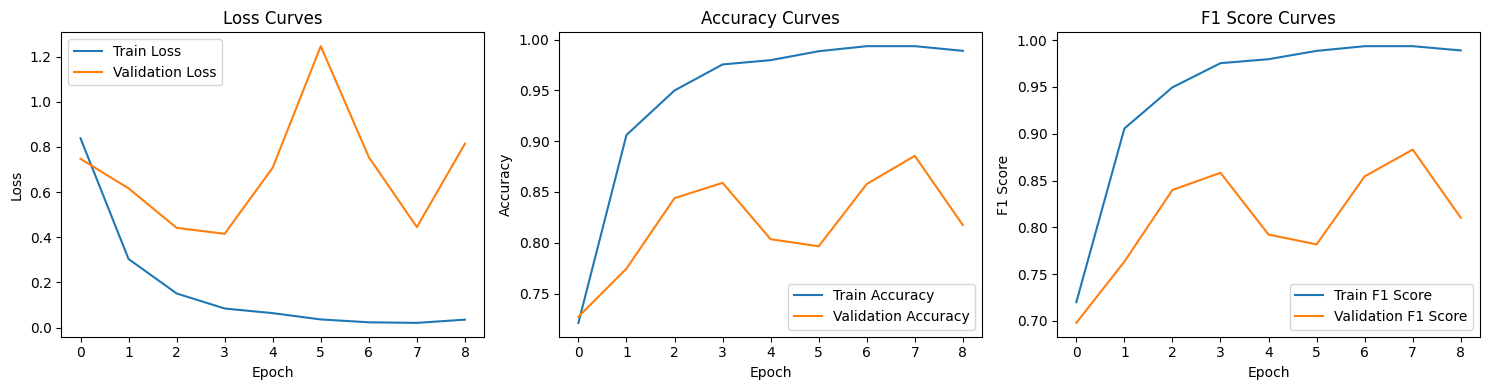

In [ ]:
# Create a 1x3 grid of subplots
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot Loss
axes[0].plot(t_loss, label='Train Loss')
axes[0].plot(v_loss, label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss Curves')
axes[0].legend()

# Plot Accuracy
axes[1].plot(t_acc, label='Train Accuracy')
axes[1].plot(v_acc, label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Accuracy Curves')
axes[1].legend()

# Plot F1 Score
axes[2].plot(t_f1, label='Train F1 Score')
axes[2].plot(v_f1, label='Validation F1 Score')
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('F1 Score')
axes[2].set_title('F1 Score Curves')
axes[2].legend()

# Adjust spacing between subplots
plt.tight_layout()
plt.savefig('drive/MyDrive/lssds24/codelatam/v2_results/training_split3.png', dpi=200, bbox_inches='tight')
# Show the plot
plt.show()

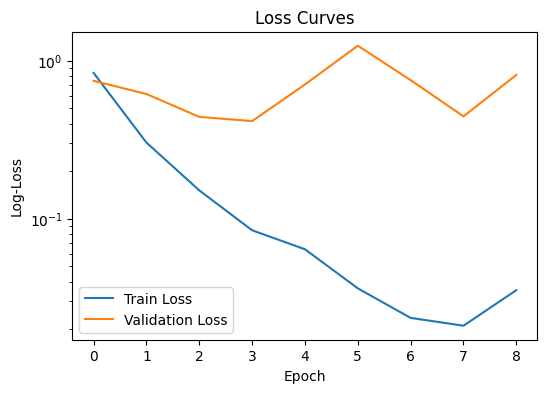

In [ ]:
# Log loss
fig, axes = plt.subplots(figsize=(6, 4))

# Plot Loss
axes.plot(t_loss, label='Train Loss')
axes.plot(v_loss, label='Validation Loss')
axes.set_yscale('log')
axes.set_xlabel('Epoch')
axes.set_ylabel('Log-Loss')
axes.set_title('Loss Curves')
axes.legend()
plt.savefig('drive/MyDrive/lssds24/codelatam/v2_results/log-loss_split3.png', dpi=200, bbox_inches='tight')

### Inference

In [ ]:
# load best_model.pth, set to eval_mode
# carpeta compartida de Juan para cargar archivo de modelo "best_model.pth"
# https://drive.google.com/drive/folders/1I9gk_JM-oFOD4xplydMrtrNrqHZeU0Jo?usp=sharing


model.load_state_dict(torch.load('drive/MyDrive/lssds24/codelatam/v2_results/best_model_split3.pth')['model'])
classifier.load_state_dict(torch.load('drive/MyDrive/lssds24/codelatam/v2_results/best_model_split3.pth')['classifier'])
model.eval()
classifier.eval()

outputs = []
with torch.no_grad():
    for batch_data in test_dataloader:
        outputs.append(predict_step(batch_data, model, processor, classifier, device))

<ipython-input-79-66d6ebc10676>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('drive/MyDrive/lssds24/codelatam/v2_results/best_model_spli

In [ ]:
outputs[0].keys()

dict_keys(['id', 'y_pred', 'y_pred_prob', 'y_true'])

In [ ]:
keys = outputs[0].keys()
outputs_dict = {key: [] for key in keys}

for i in range(len(outputs)):
    for key in keys:
        outputs_dict[key].append(outputs[i][key])

outputs_dict = {key: np.concatenate(values) for key, values in outputs_dict.items()}
outputs_dict

{'id': array(['sn2007sr_0_0_108.8_2341', 'sn2005am_0_0_4.9_2029',
        'sn2002ha_0_0_-4.2_1929', ..., 'sn2009jf_6_1_-7.0_5345',
        'sn2004gq_6_1_89.3_5248', 'LSQ14efd_10_2_3.89_5618'], dtype='<U28'),
 'y_pred': array([0, 0, 0, ..., 2, 2, 2]),
 'y_pred_prob': array([[9.7492367e-01, 2.3638202e-02, 1.4380632e-03],
        [9.9884641e-01, 9.9219102e-04, 1.6129104e-04],
        [9.9872154e-01, 1.0616441e-03, 2.1683081e-04],
        ...,
        [7.0536492e-04, 1.0839840e-03, 9.9821067e-01],
        [8.0675696e-04, 6.6233752e-04, 9.9853086e-01],
        [3.9491305e-04, 5.7596999e-04, 9.9902916e-01]], dtype=float32),
 'y_true': array([0, 0, 0, ..., 2, 2, 2])}

In [ ]:
outputs_dict['y_true'] = [inv_dict_mapping_classes[val] for val in outputs_dict['y_true']]
outputs_dict['y_pred'] = [inv_dict_mapping_classes[val] for val in outputs_dict['y_pred']]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(outputs_dict['y_true'], outputs_dict['y_pred'], digits=4))

              precision    recall  f1-score   support

     Ia-norm     0.8434    0.9355    0.8871       403
      Ia-pec     0.9231    0.6486    0.7619       333
      Others     0.8307    0.9696    0.8948       329

    accuracy                         0.8563      1065
   macro avg     0.8657    0.8512    0.8479      1065
weighted avg     0.8644    0.8563    0.8503      1065



### Confusion matrix

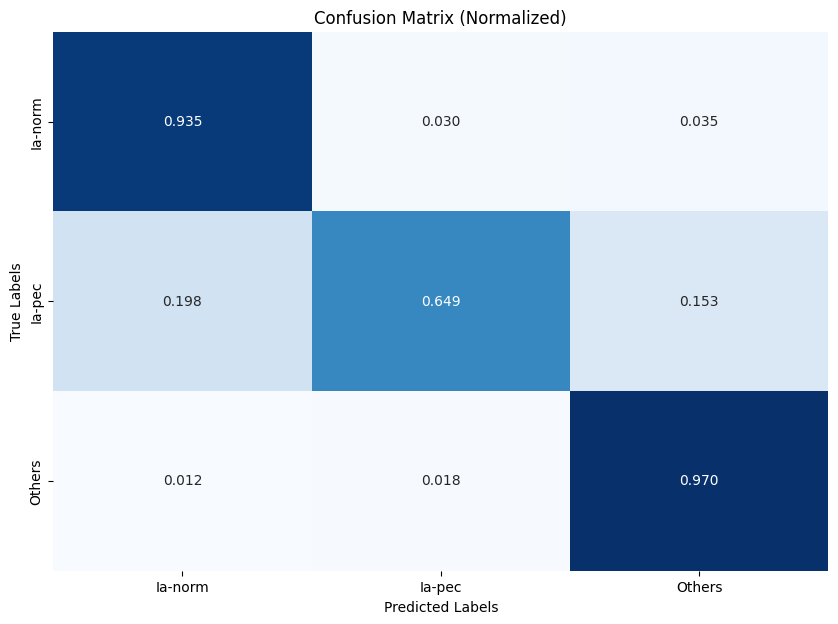

In [ ]:
# plot confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have 'outputs_dict' with 'y_true' and 'y_pred'

# Crear la matriz de confusión
cm = confusion_matrix(outputs_dict['y_true'], outputs_dict['y_pred'])

# Normalizar la matriz de confusión por filas (verdaderos)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Obtener los nombres de las clases desde el diccionario
class_names = inv_dict_mapping_classes.values()

# Dibujar el heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.3f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Normalized)')
plt.savefig('drive/MyDrive/lssds24/codelatam/v2_results/confusion_matrix_split3.png', dpi=200, bbox_inches='tight')
plt.show()

In [ ]:
subtype_mapping = {0: 'Ia-norm',
                   1: 'Ia-91T',
                   2: 'Ia-91bg',
                   3: 'Ia-csm',
                   4: 'Iax',
                   5: 'Ia-pec',
                   6: 'Ib-norm',
                   7: 'Ibn',
                   8: 'IIb',
                   9: 'Ib-pec',
                   10: 'Ic-norm',
                   11: 'Ic-broad',
                   12: 'Ic-pec',
                   13: 'IIP',
                   14: 'IIL',
                   15: 'IIn',
                   16: 'II-pec'}

### Missclassified images

In [ ]:
# identify all missclassified Images
missclassified_ia_norm_as_ia_pec = []
missclassified_ia_norm_as_others = []
missclassified_ia_pec_as_ia_norm = []
missclassified_ia_pec_as_others = []
missclassified_others_as_ia_norm = []
missclassified_others_as_ia_pec = []

for i in range(len(outputs_dict['y_true'])):
  if outputs_dict['y_true'][i] == 'Ia-norm' and outputs_dict['y_pred'][i] == 'Ia-pec':
    missclassified_ia_norm_as_ia_pec.append(outputs_dict['id'][i])
  elif outputs_dict['y_true'][i] == 'Ia-norm' and outputs_dict['y_pred'][i] == 'Others':
    missclassified_ia_norm_as_others.append(outputs_dict['id'][i])
  elif outputs_dict['y_true'][i] == 'Ia-pec' and outputs_dict['y_pred'][i] == 'Ia-norm':
    missclassified_ia_pec_as_ia_norm.append(outputs_dict['id'][i])
  elif outputs_dict['y_true'][i] == 'Ia-pec' and outputs_dict['y_pred'][i] == 'Others':
    missclassified_ia_pec_as_others.append(outputs_dict['id'][i])
  elif outputs_dict['y_true'][i] == 'Others' and outputs_dict['y_pred'][i] == 'Ia-norm':
    missclassified_others_as_ia_norm.append(outputs_dict['id'][i])
  elif outputs_dict['y_true'][i] == 'Others' and outputs_dict['y_pred'][i] == 'Ia-pec':
    missclassified_others_as_ia_pec.append(outputs_dict['id'][i])

print("Missclassified Ia-norm as Ia-pec images:")
print(missclassified_ia_norm_as_ia_pec)

print("Missclassified Ia-norm as Others images:")
print(missclassified_ia_norm_as_others)

Missclassified Ia-norm as Ia-pec images:
['sn2005eu_0_0_-5.2_653', 'sn2005mc_0_0_5.6_2164', 'sn2005eu_0_0_-9.0_651', 'sn2006cm_0_0_-1.0_1220', 'sn2006D_0_0_4.5_2120', 'sn2007kk_0_0_90.4_287', 'sn2005eu_0_0_8.3_654', 'sn2004eo_0_0_7.8_985', 'sn2006eu_0_0_8.0_941', 'sn2003W_0_0_28.0_2216', 'sn2003cg_0_0_37.8_521', 'sn2000fa_0_0_37.5_1293']
Missclassified Ia-norm as Others images:
['sn2007qe_0_0_22.6_1493', 'sn2004dt_0_0_346.8_258', 'sn2003cg_0_0_-8.9_483', 'sn2006gr_0_0_-10.8_1627', 'sn2003W_0_0_-10.2_2204', 'sn2004dt_0_0_57.5_254', 'sn2006lf_0_0_44.6_959', 'sn2004dt_0_0_149.6_257', 'sn2004dt_0_0_-9.9_220', 'sn2003W_0_0_21.2_2214', 'sn2003W_0_0_-11.1_2203', 'sn2005eu_0_0_10.3_655', 'sn2004dt_0_0_109.3_256', 'sn2006gr_0_0_12.4_1638']


In [ ]:
# make the plot in a nxn grid
import matplotlib.pyplot as plt

def plot_missclassified_images(image_ids, root_dir, subfolder, prediction, ncols=3):
  """Plots missclassified images from a list of image IDs in a grid.

  Args:
      image_ids: A list of image IDs.
      root_dir: The root directory where the images are stored.
      subfolder: The subfolder within the root directory where the images are stored.
      ncols: Number of columns in the grid.
  """

  nrows = (len(image_ids) + ncols - 1) // ncols  # Calculate the number of rows needed
  fig, axes = plt.subplots(nrows, ncols, figsize=(15, 3 * nrows))

  # Check if axes is 1-dimensional and convert to 2-dimensional if necessary
  if nrows == 1 or ncols == 1:
    axes = axes.reshape(nrows, ncols) # added this line to reshape axes to 2d if it's 1d

  for i, image_id in enumerate(image_ids):
    image_path = os.path.join(root_dir, subfolder, image_id + ".png")
    if os.path.exists(image_path):
      img = plt.imread(image_path)
      row = i // ncols
      col = i % ncols
      axes[row, col].imshow(img)
      axes[row, col].set_title(f"Missclassified Image: {image_id}\n Label: {inv_dict_mapping_classes[maping(int(image_id.split('_')[1]))]}, Subtype: {subtype_mapping[int(image_id.split('_')[1])]} \n Prediction: {prediction}")
      axes[row, col].axis('off')  # Turn off axis labels and ticks
  # Remove any empty subplots
  for i in range(len(image_ids), nrows * ncols):
    row = i // ncols
    col = i % ncols
    fig.delaxes(axes[row, col])

  plt.tight_layout()
  plt.show()

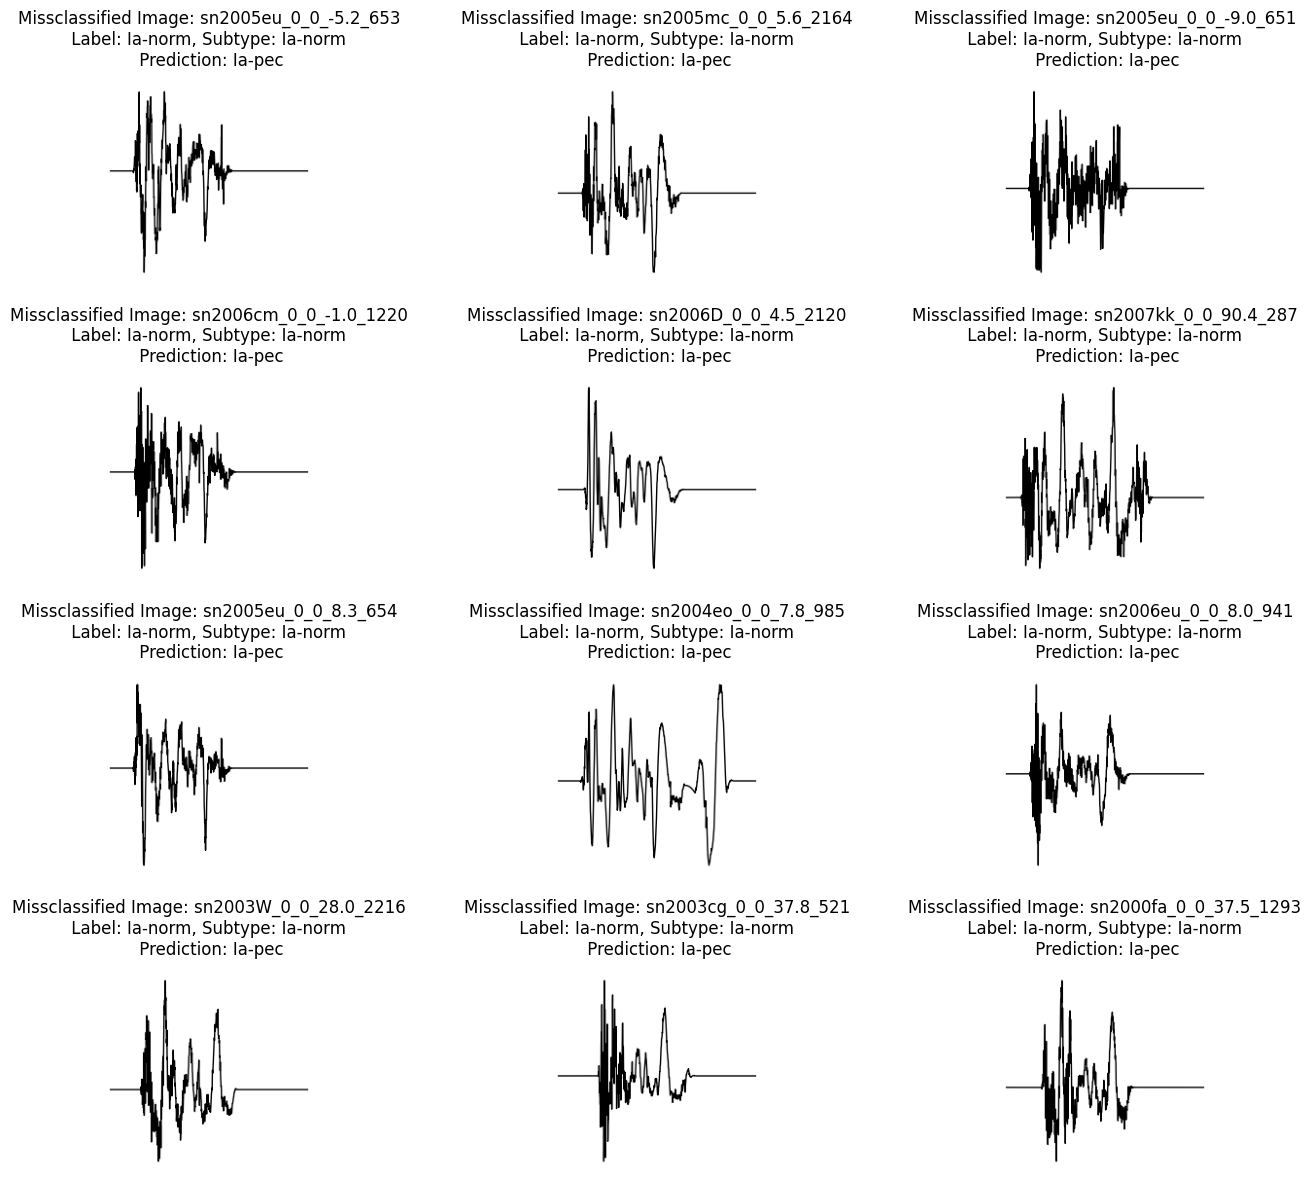

In [ ]:
# Plot the Ia-norm missclassified as ia-pec
plot_missclassified_images(missclassified_ia_norm_as_ia_pec, root_dir, "0", prediction='Ia-pec', ncols=3)

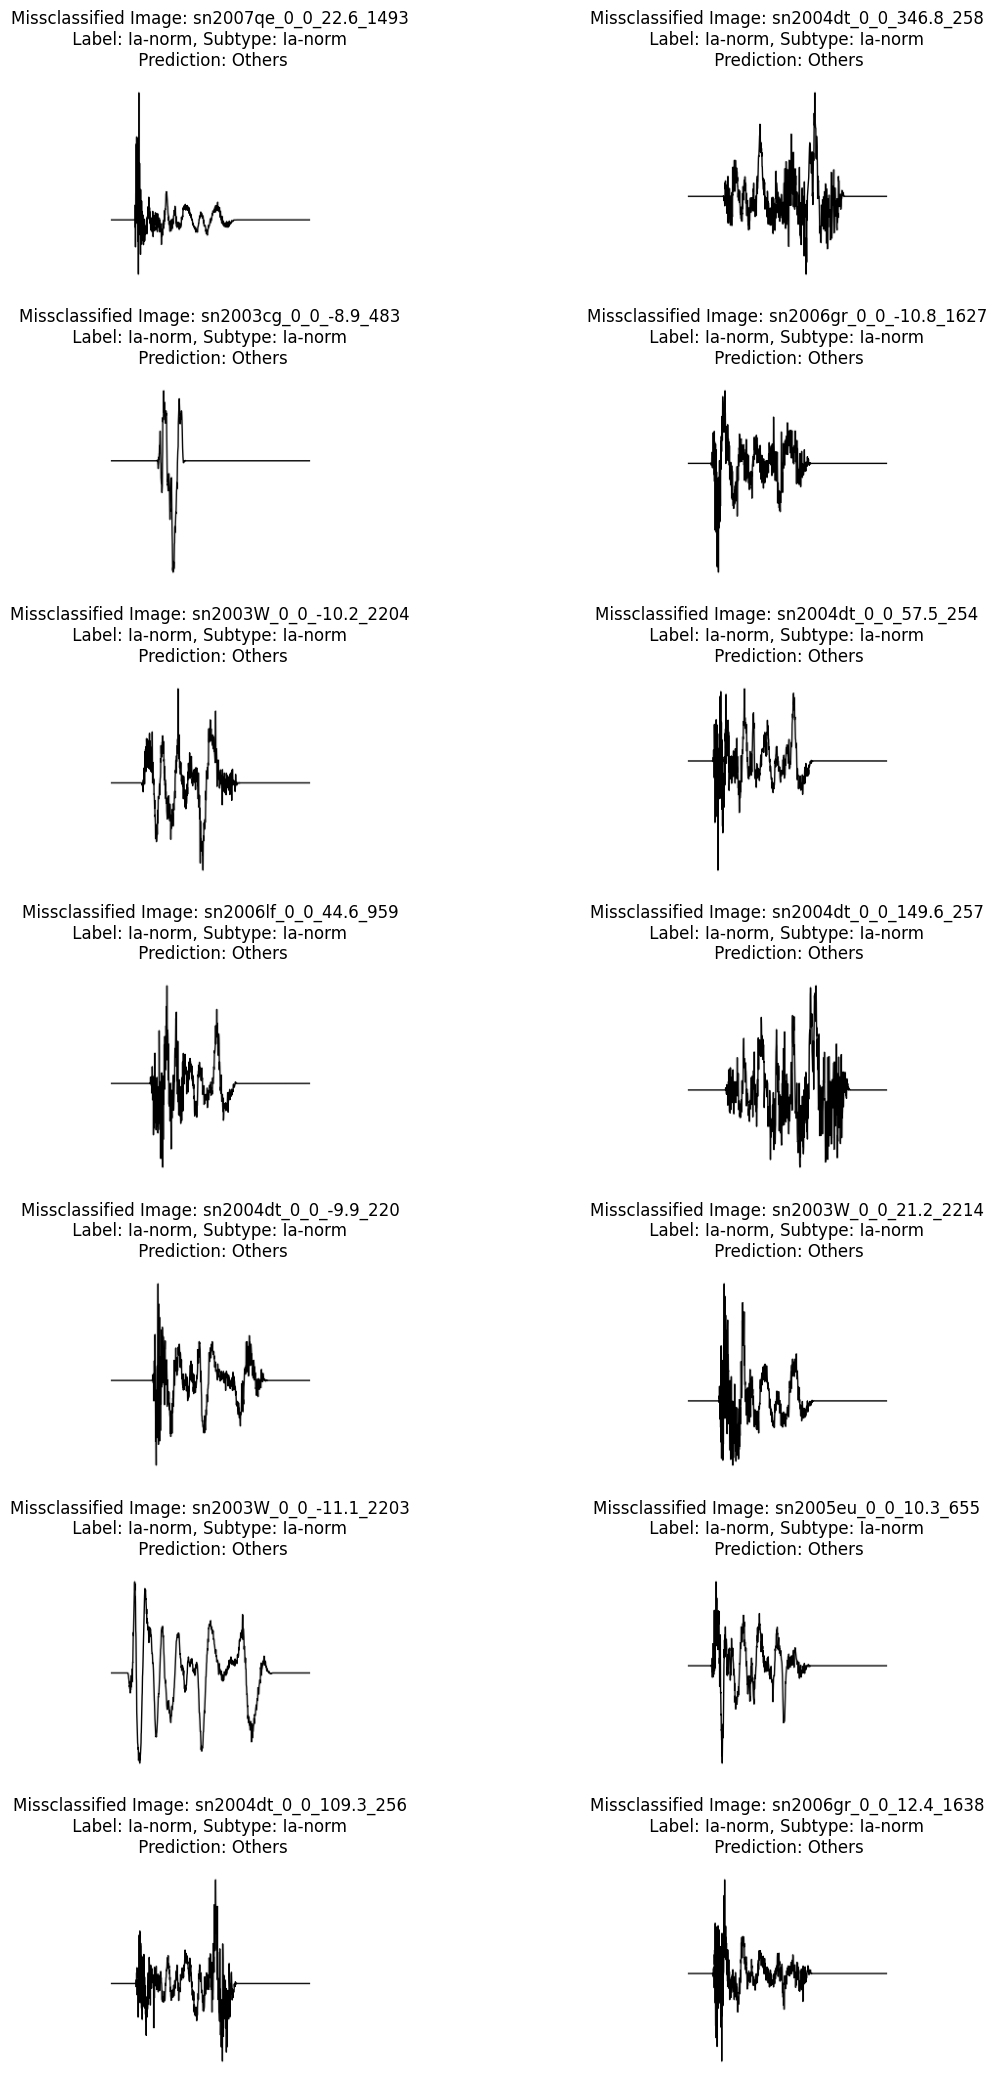

In [ ]:
# Plot the Ia-norm missclassified as other
plot_missclassified_images(missclassified_ia_norm_as_others, root_dir, "0", prediction='Others', ncols=2)

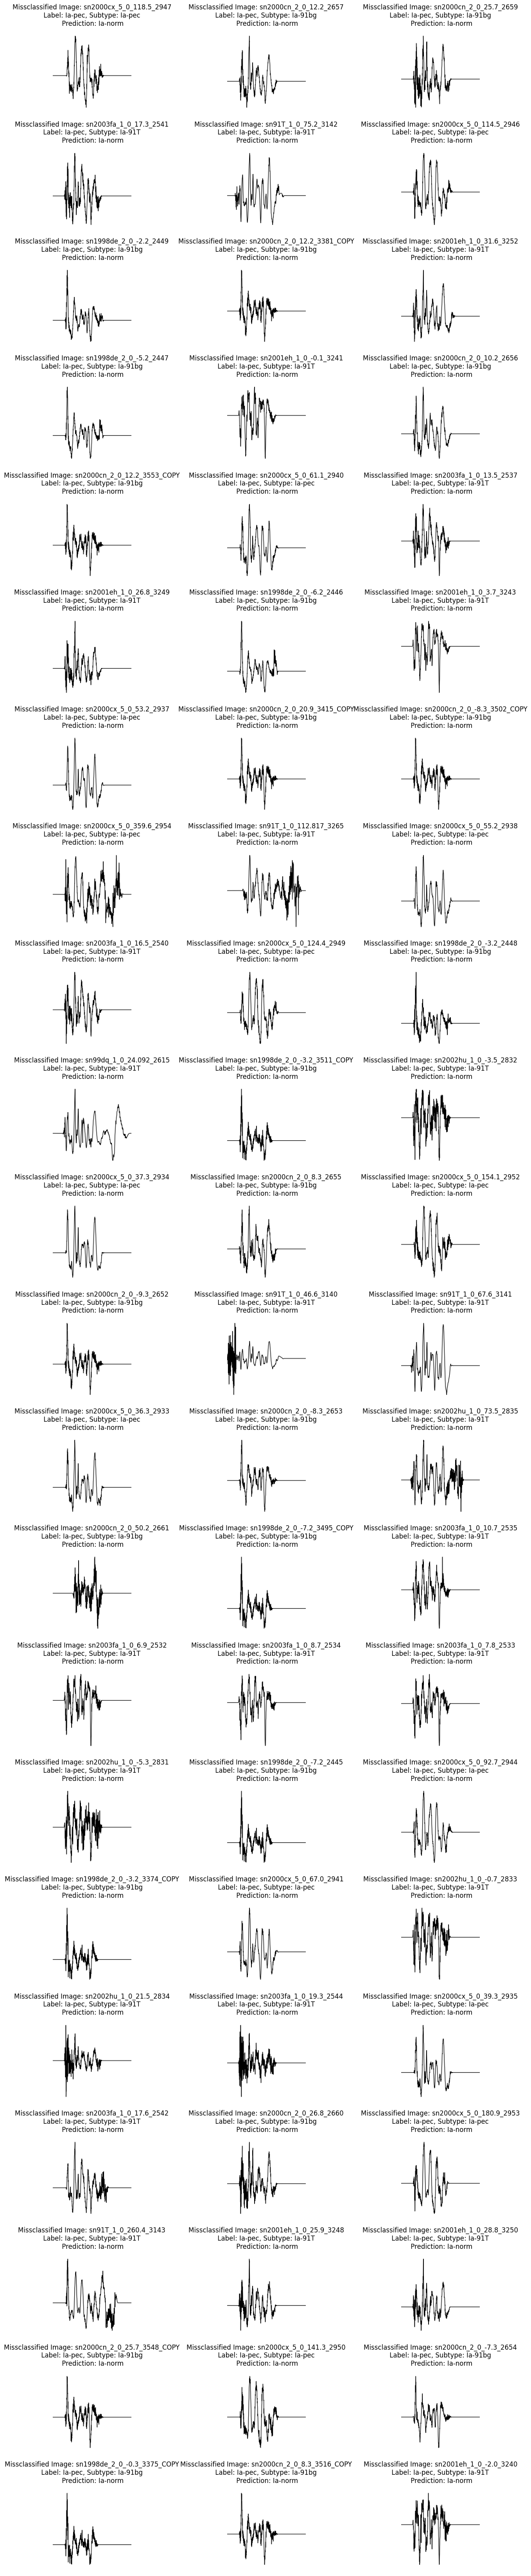

In [ ]:
#plot the Ia-pec missclassified as Ia-norm
plot_missclassified_images(missclassified_ia_pec_as_ia_norm, root_dir, "1", prediction='Ia-norm', ncols=3)

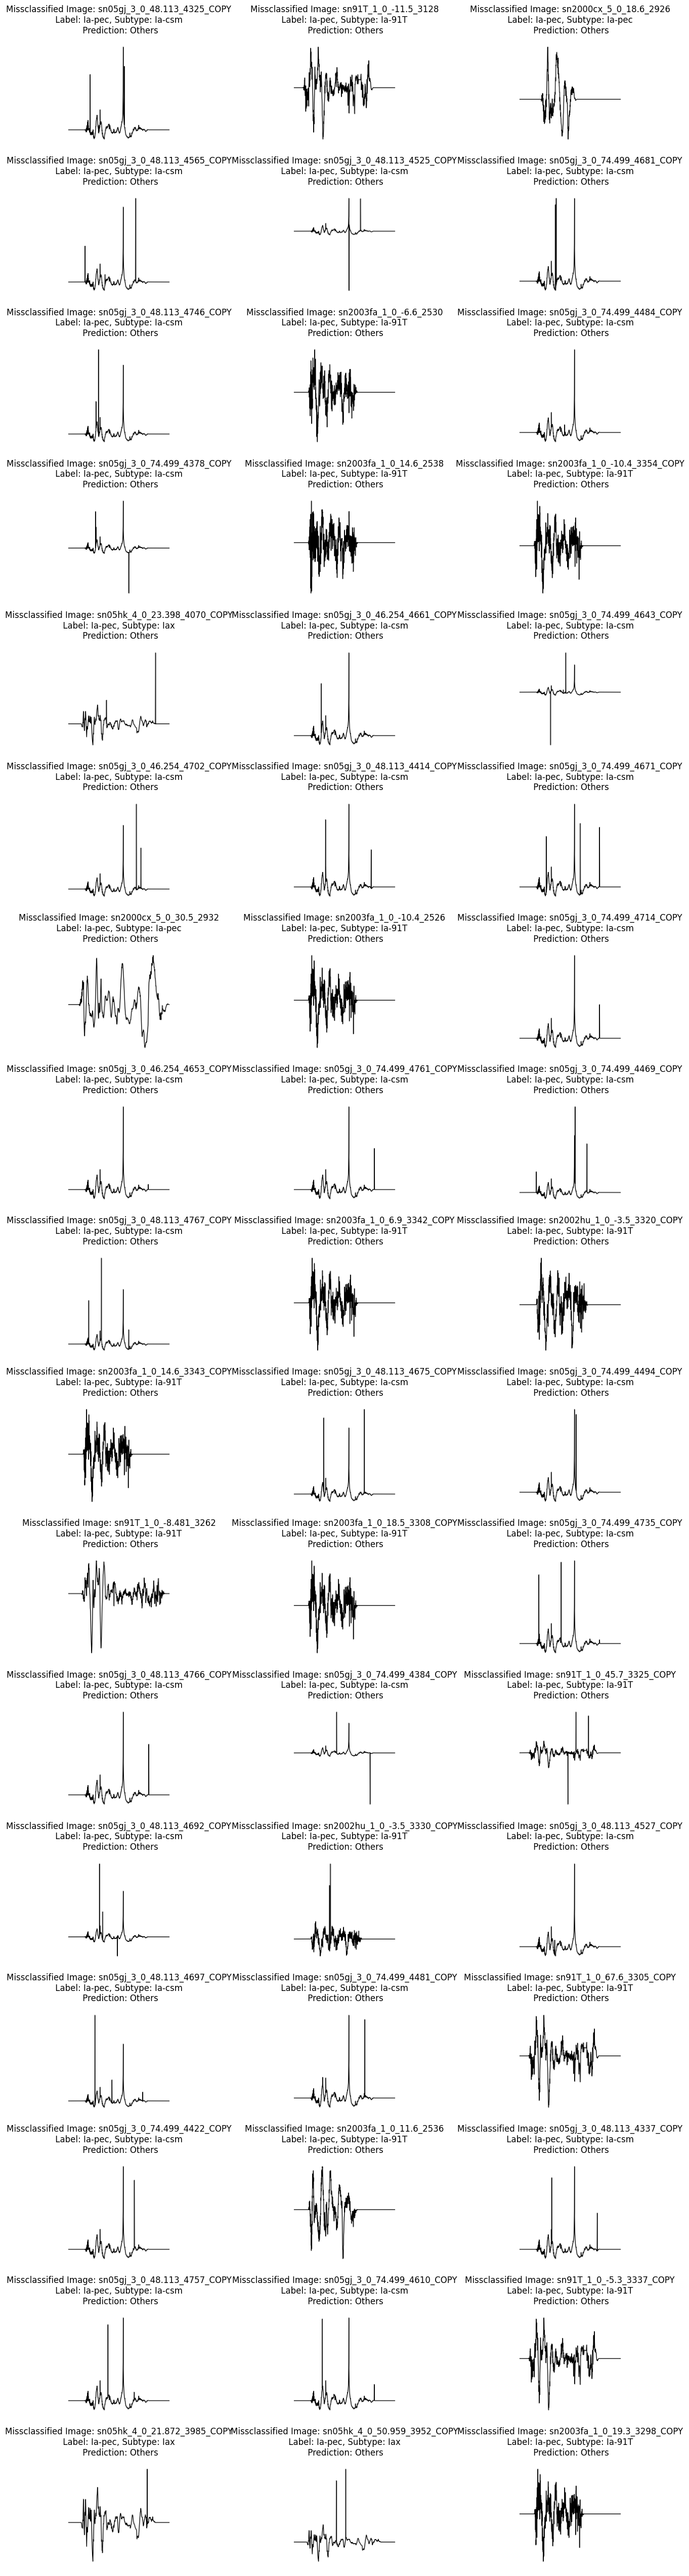

In [ ]:
plot_missclassified_images(missclassified_ia_pec_as_others, root_dir, "1", prediction='Others', ncols=3)

In [ ]:
# check how many Ia-91T are in test set, also save phases
Ia91t_in_test = []
phases = []
for i in splits['1']['test']:
  a = i.split('_')[1]
  if a == '1':
    Ia91t_in_test.append(i.split('_')[0])
    phases.append(float(i.split('_')[3]))
print(list(set(Ia91t_in_test)))
print('Ia-91T in test set:', len(Ia91t_in_test))
print('Ia-91T missclassified:', len(missclassified_ia_pec_as_ia_norm))

['sn2002hu', 'sn08ds', 'sn2001V', 'sn1999gp', 'sn95ac', 'sn2005eq']
Ia-91T in test set: 92
Ia-91T missclassified: 49


In [ ]:
miss_phases = []
for image_name in missclassified_ia_pec_as_ia_norm:
  miss_phases.append(float(image_name.split('_')[3]))

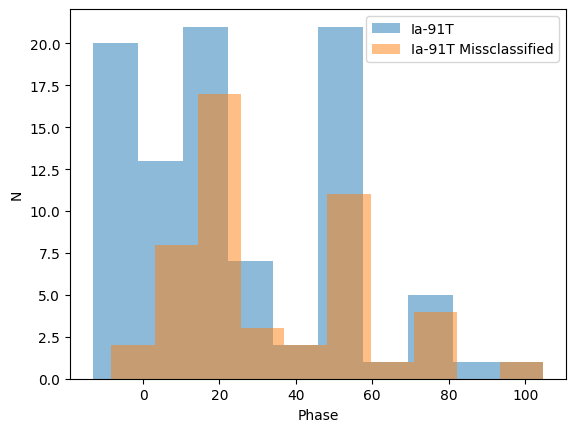

In [ ]:
plt.hist(phases, alpha=0.5, label='Ia-91T')
plt.hist(miss_phases, alpha=0.5, label='Ia-91T Missclassified')
plt.xlabel('Phase')
plt.ylabel('N')
plt.legend()
plt.savefig('drive/MyDrive/lssds24/codelatam/Ia-91T-phases-histogram.png', dpi=200, bbox_inches='tight')
plt.show()

In [ ]:
# I want to check if the Ia-norm's missclassified as Ia-pec are generally older SNs
# Need to get the year of the SN and plot an histogram of

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/juanserrano90/codelatam/refs/heads/main/Data/Redshift/sn_redshift.csv')

In [ ]:
years_miss = []
for image_name in missclassified_ia_norm_as_ia_pec:
  name = image_name.split('_')[0].lower()
  year = df[df['old_name'] == name]['year'].values[0]
  years_miss.append(year)
print(len(years_miss), len(missclassified_ia_norm_as_ia_pec))

years_ianorm = []
unique_ianorms = []
for image_name in image_lists['0']:
  name = image_name.split('_')[0].lower()
  if name not in unique_ianorms:
    unique_ianorms.append(name)
    year = df[df['old_name'] == name]['year'].values[0]
    years_ianorm.append(year)
print(len(years_ianorm), len(image_lists['0']))
print(len(unique_ianorms))

22 22
319 2387
319


In [ ]:
print(np.array(years_ianorm).min(), np.array(years_ianorm).max())

1981 2008


Median year for Ia-norm: 2003.0
Median year for missclassified Ia-norm: 1999.5
Total count of Ia-norm: 319
Total count of missclassified Ia-norm: 22


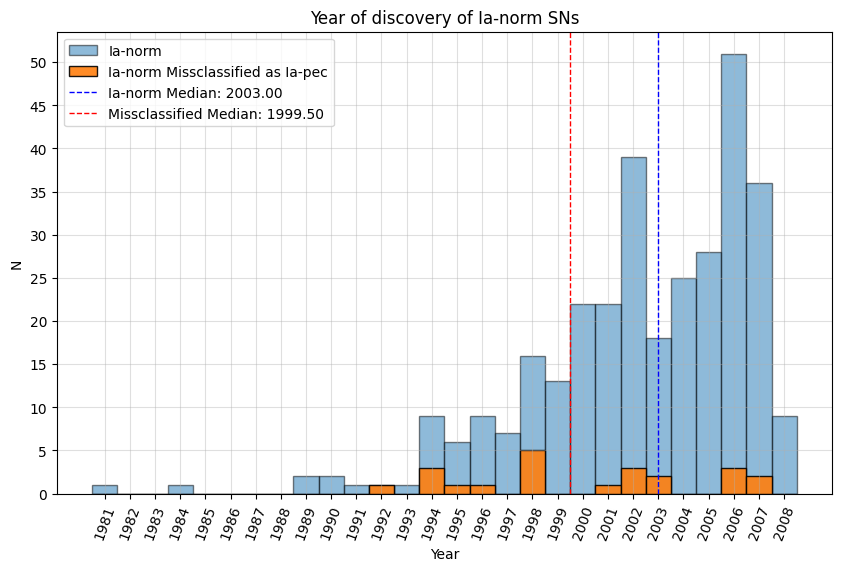

In [ ]:
# Calculate medians and counts
median_ianorm = np.median(years_ianorm)
median_missclassified = np.median(years_miss)
count_ianorm = len(years_ianorm)
count_missclassified = len(years_miss)

# Print or use the results as needed
print(f"Median year for Ia-norm: {median_ianorm}")
print(f"Median year for missclassified Ia-norm: {median_missclassified}")
print(f"Total count of Ia-norm: {count_ianorm}")
print(f"Total count of missclassified Ia-norm: {count_missclassified}")

# Example of adding the medians to a plot (assuming the plot code from your example)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(years_ianorm, alpha=0.5, bins=np.arange(1981, 2010), align='left', edgecolor='black', label='Ia-norm')
ax.hist(years_miss, alpha=0.9, bins=np.arange(1981, 2010), align='left', edgecolor='black', label='Ia-norm Missclassified as Ia-pec')
ax.axvline(median_ianorm, color='blue', linestyle='dashed', linewidth=1, label=f'Ia-norm Median: {median_ianorm:.2f}')
ax.axvline(median_missclassified, color='red', linestyle='dashed', linewidth=1, label=f'Missclassified Median: {median_missclassified:.2f}')


plt.xlabel('Year')
plt.xticks(np.arange(1981, 2009), rotation=70)
plt.yticks(np.arange(0, 51, 5))
plt.ylabel('N')
plt.title('Year of discovery of Ia-norm SNs')
plt.legend()
plt.grid(True, alpha=0.4)
plt.savefig('drive/MyDrive/lssds24/codelatam/Ia-norm-missclassidief-years-histogram_with_medians.png', dpi=200, bbox_inches='tight')
plt.show()